In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import dash_bootstrap_components as dbc
from dash import html,dcc,Input,Output,Dash

In [2]:
df = pd.read_csv('./dataset/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Dash

In [180]:
app = Dash(__name__)

app.layout = html.Div(
                 [
                     dbc.Container(
                         [
                             html.H1("Analytics Dashboard of Game Sale (Dash Plotly)", style={"textAlign":"center"}),
                             html.Hr(),
                             html.P('Value Count By Selected Column:'),
                             html.Div([
                                 dcc.Dropdown(
                                     id='dropdown_value_count',
                                     options=['Platform','Genre','Publisher'],
                                     placeholder='Choose The Columns To Count...',
                                     style={'width':'50%'},
                                     persistence='string',
                                     persistence_type='local'
                                 )
                             ]),
                             html.Div([
                                 dcc.Graph(id='bar_val_count')
                             ]),
                             html.Br(),
                             html.P('Sales By Selected Region And Other Condition:'),
                             html.Div([
                                 dcc.Dropdown(
                                     id='dropdown_sales_count',
                                     options=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],
                                     placeholder='Choose Reigion To Count...',
                                     style={'width':'50%'},
                                     persistence='string',
                                     persistence_type='local'
                                 )
                             ]),
                             html.Br(),
                             html.Div([
                                 dcc.RadioItems(
                                     id='checklist_platform_or_genre',
                                     options=['Platform','Genre','Publisher'],
                                     inline=True,
                                     persistence='string',
                                     persistence_type='local'          
                                 ),
                                 dcc.Graph(id='sales_bar',style={'width':'60%','display':'inline-block'}),
                                 dcc.Graph(id='stack_sales',style={'width':'40%','display':'inline-block'})
                             ]),
                         ])
                 ])

@app.callback(
    Output('bar_val_count','figure'),
    Output('sales_bar','figure'),
    Output('stack_sales','figure'),
    Input('dropdown_value_count','value'),
    Input('dropdown_sales_count','value'),
    Input('checklist_platform_or_genre','value')
)

def plot_graph(val_count_col,sales_col,platform_or_genre):
    val_count_df = df[val_count_col].value_counts().rename_axis(val_count_col).reset_index(name='counts').head(10)
    fig1 = px.bar(val_count_df,x=val_count_col,y='counts',color=val_count_col,title=f'Games Count By {val_count_col}')
    
    if not platform_or_genre:
        sales_count_df = df.groupby(platform_or_genre)[sales_col].sum().rename_axis(platform_or_genre).reset_index(name='Sales').sort_values(by='Sales',ascending=False)
        fig2 = px.bar(sales_count_df,x=platform_or_genre,y='Sales',color=platform_or_genre,title=f'Most Selling Games By {platform_or_genre} In {sales_col}')
    else:
        sales_count_df = df.groupby(platform_or_genre)[sales_col].sum().rename_axis(platform_or_genre).reset_index(name='Sales').sort_values(by='Sales',ascending=False).head(10)
        fig2 = px.bar(sales_count_df,x=platform_or_genre,y='Sales',color=platform_or_genre,title=f'Games Sales By {platform_or_genre} In {sales_col}')
    
    na = round(df['NA_Sales'].sum(),2)
    eu = round(df['EU_Sales'].sum(),2)
    jp = round(df['JP_Sales'].sum(),2)
    other = round(df['Other_Sales'].sum(),2)
    data = [[na,eu,jp,other]]
    temp = pd.DataFrame(data,columns=['EU','NA','JP','Other']).T.reset_index()
    temp.columns = ['region','sales']
    fig3 = px.bar(temp,x='region',y='sales',barmode='group',color='region',title='Total Sales By Region')
    fig3.update_traces(width=1)
    return fig1,fig2,fig3

In [181]:
if __name__ == '__main__':
    app.run_server(debug=False,port=3004)

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is running on http://127.0.0.1:3004/

Dash is run

 * Running on http://127.0.0.1:3004/ (Press CTRL+C to quit)
127.0.0.1 - - [07/Apr/2022 20:04:25] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Apr/2022 20:04:26] "GET /assets/css/bootstrap.min.css?m=1647935570.6230385 HTTP/1.1" 304 -
127.0.0.1 - - [07/Apr/2022 20:04:26] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [07/Apr/2022 20:04:26] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [07/Apr/2022 20:04:26] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Apr/2022 20:04:26] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Apr/2022 20:04:26] "GET /_favicon.ico?v=2.3.0 HTTP/1.1" 200 -
127.0.0.1 - - [07/Apr/2022 20:04:26] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Apr/2022 20:04:26] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [07/Apr/2022 20:04:33] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [07/Apr/2022 20:04:37] "POST /_dash-u

In [54]:
# create bar chart with Platform/Publisher and groupby Genre then inspect individual sales
# test = df.groupby('Genre')['NA_Sales'].sum().rename_axis('Genre').reset_index(name='Sales').sort_values(by='Sales',ascending=False)

# px.bar(test,x='Genre',y='Sales',color='Genre',title='Most Selling Type of Games in NA')

In [79]:
# def test(sales_col):    
#     sales_count_df = df.groupby('Genre')[sales_col].sum().rename_axis('Genre').reset_index(name='Sales').sort_values(by='Sales',ascending=False)
#     fig2 = px.bar(sales_count_df,x='Genre',y='Sales',color='Genre',title=f'Most Selling Type of Games in {sales_col}')
#     return fig2

# test('NA_Sales')

In [42]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
def test():
    na = round(df['NA_Sales'].sum() / df['Global_Sales'].sum(),2)
    eu = round(df['EU_Sales'].sum() / df['Global_Sales'].sum(),2)
    jp = round(df['JP_Sales'].sum() / df['Global_Sales'].sum(),2)
    other = round(df['Other_Sales'].sum() / df['Global_Sales'].sum(),2)
    temp = pd.DataFrame()

In [135]:
# na = round(df['NA_Sales'].sum() / df['Global_Sales'].sum(),2)
# eu = round(df['EU_Sales'].sum() / df['Global_Sales'].sum(),2)
# jp = round(df['JP_Sales'].sum() / df['Global_Sales'].sum(),2)
# other = round(df['Other_Sales'].sum() / df['Global_Sales'].sum(),2)

# data = [[na,eu,jp,other]]
# temp = pd.DataFrame(data,columns=['eu','na','jp','other'])
# fig = px.bar(temp,barmode='stack')
# fig.update_traces(width=0.1)


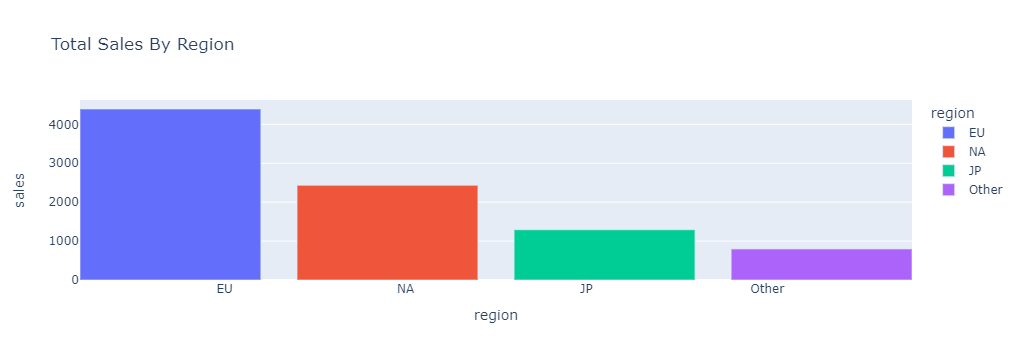

In [161]:
na = round(df['NA_Sales'].sum(),2)
eu = round(df['EU_Sales'].sum(),2)
jp = round(df['JP_Sales'].sum(),2)
other = round(df['Other_Sales'].sum(),2)

data = [[na,eu,jp,other]]
temp = pd.DataFrame(data,columns=['EU','NA','JP','Other']).T.reset_index()
temp.columns = ['region','sales']
fig = px.bar(temp,x='region',y='sales',barmode='group',color='region',title='Total Sales By Region')
fig.update_traces(width=1)